In [1]:
import numpy as np

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

tf.keras.backend.clear_session()  # 重置notebook中keras的状态

In [2]:
inputs = keras.Input(shape=(784,))

In [3]:
img_inputs = keras.Input(shape=(32, 32, 3))

In [4]:
inputs.shape

TensorShape([None, 784])

In [5]:
inputs.dtype

tf.float32

In [6]:
dense = layers.Dense(64, activation='relu')
x = dense(inputs)

In [7]:
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10)(x)

In [8]:
model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

In [9]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


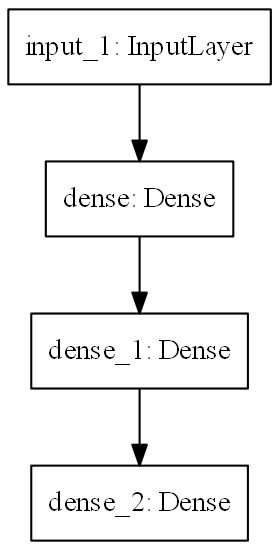

In [11]:
keras.utils.plot_model(model, 'my_first_model.png',dpi=150)

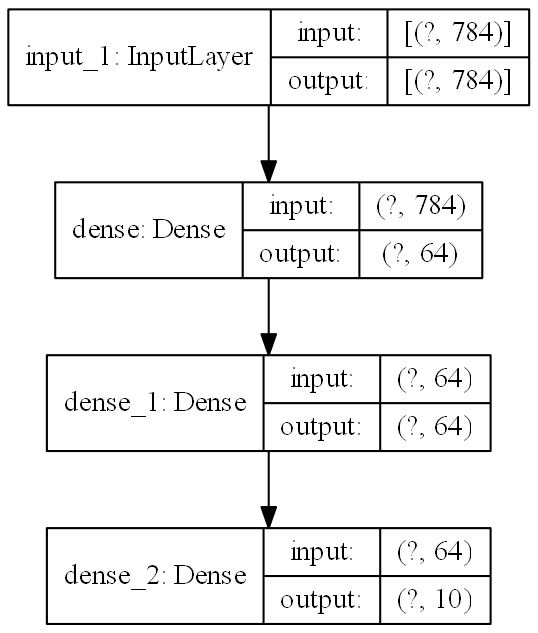

In [14]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_layer_names=True, show_shapes=True, dpi=150)

In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=5,
                    validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 93us/sample - loss: 0.3414 - accuracy: 0.9040 - val_loss: 0.1884 - val_accuracy: 0.9439
Epoch 2/5
48000/48000 [==============================] - 3s 67us/sample - loss: 0.1616 - accuracy: 0.9513 - val_loss: 0.1532 - val_accuracy: 0.9578
Epoch 3/5
48000/48000 [==============================] - 3s 65us/sample - loss: 0.1197 - accuracy: 0.9648 - val_loss: 0.1253 - val_accuracy: 0.9640
Epoch 4/5
48000/48000 [==============================] - 3s 65us/sample - loss: 0.0947 - accuracy: 0.9715 - val_loss: 0.1185 - val_accuracy: 0.9668
Epoch 5/5
48000/48000 [==============================] - 3s 64us/sample - loss: 0.0801 - accuracy: 0.9762 - val_loss: 0.1061 - val_accuracy: 0.9704
10000/10000 - 1s - loss: 0.0919 - accuracy: 0.9745
Test loss: 0.091879672590876
Test accuracy: 0.9745


In [16]:
model.save('path_to_my_model')
del model
# 从文件重新创建完全相同的模型：
model = keras.models.load_model('path_to_my_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: path_to_my_model\assets


In [17]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

In [18]:
encoder_input = keras.Input(shape=(28, 28, 1), name='original_img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

decoder_input = keras.Input(shape=(16,), name='encoded_img')
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)

decoder = keras.Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name='img')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name='autoencoder')
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

In [19]:
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = layers.Dense(1)(inputs)
    return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)
ensemble_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
model (Model)                   (None, 1)            129         input_6[0][0]                    
__________________________________________________________________________________________________
model_1 (Model)                 (None, 1)            129         input_6[0][0]                    
__________________________________________________________________________________________________
model_2 (Model)                 (None, 1)            129         input_6[0][0]                    
____________________________________________________________________________________________

In [20]:
num_tags = 12  # 问题标签的数量
num_words = 10000  # 预处理文本数据时获得的词汇量
num_departments = 4  # 预测部门数

title_input = keras.Input(shape=(None,), name='title')  # 可变长度的整数序列
body_input = keras.Input(shape=(None,), name='body')  # 可变长度的整数序列
tags_input = keras.Input(shape=(num_tags,), name='tags')  # 大小为num_tags的二进制向量

# 将标题中的每个单词嵌入到64维向量中
title_features = layers.Embedding(num_words, 64)(title_input)
# 将文本中的每个单词嵌入到64维向量中
body_features = layers.Embedding(num_words, 64)(body_input)

# 将标题中嵌入单词的序列减少为单个128维向量
title_features = layers.LSTM(128)(title_features)
# 将body内嵌入词的序列化为单个32维向量
body_features = layers.LSTM(32)(body_features)

# 通过concatenate（级联）将所有可用功能合并到单个向量中
# 它以张量列表作为输入，除了级联轴外，它们均具有相同的形状，并返回单个张量，即所有输入的级联。
x = layers.concatenate([title_features, body_features, tags_input])

# 通过特征使用逻辑回归以进行优先级预测
priority_pred = layers.Dense(1, name='priority')(x)
# 通过特征对部分进行分类
department_pred = layers.Dense(num_departments, name='department')(x)

# 实例化预测优先级和部门的端到端模型
model = keras.Model(inputs=[title_input, body_input, tags_input],
                    outputs=[priority_pred, department_pred])

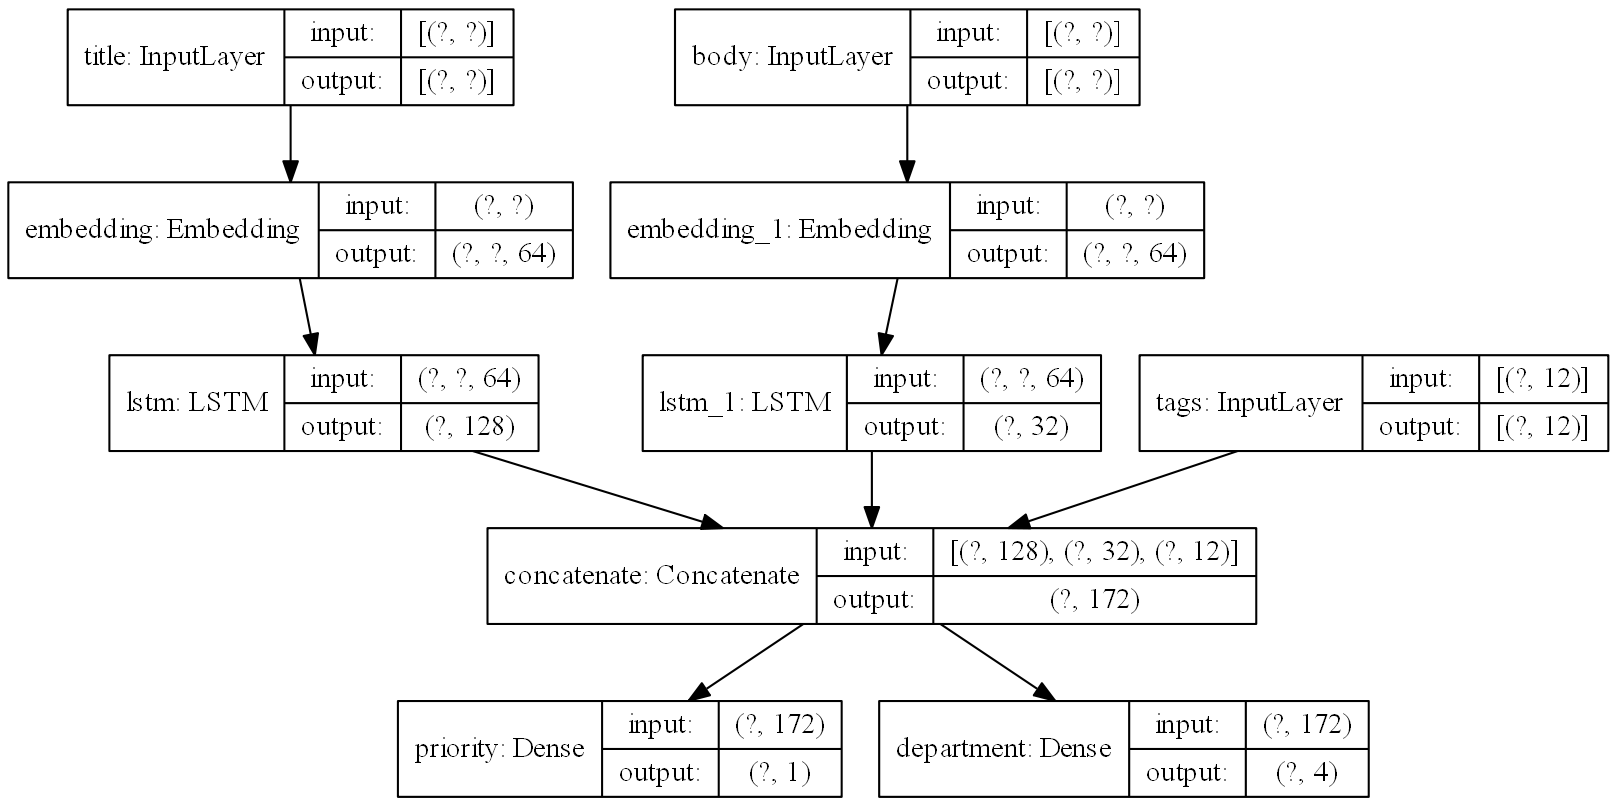

In [21]:
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True, dpi=150)

In [22]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss=[keras.losses.BinaryCrossentropy(from_logits=True),
                    keras.losses.CategoricalCrossentropy(from_logits=True)],
              loss_weights=[1., 0.2])

In [23]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss={'priority':keras.losses.BinaryCrossentropy(from_logits=True),
                    'department': keras.losses.CategoricalCrossentropy(from_logits=True)},
              loss_weights=[1., 0.2])

In [24]:
title_data = np.random.randint(num_words, size=(1280, 10))
title_data

array([[3948, 1087, 4467, ..., 9802, 7540, 2453],
       [1459, 5406,  856, ..., 7394, 6580,  460],
       [9531, 7834, 7891, ..., 1449, 6827, 8931],
       ...,
       [8036, 5263, 2167, ..., 7967, 8634, 6751],
       [9965, 1206, 6310, ..., 1590, 7853, 4861],
       [8030, 6144, 8289, ..., 9745, 3143, 5950]])

In [25]:
priority_targets = np.random.random(size=(1280, 1))
priority_targets

array([[0.03187193],
       [0.25814595],
       [0.54725329],
       ...,
       [0.41702214],
       [0.67817736],
       [0.37776296]])

In [26]:
# 构造虚拟输入数据
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype('float32')

# 构造期望输出数据
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

# 训练
model.fit({'title': title_data, 'body': body_data, 'tags': tags_data},
          {'priority': priority_targets, 'department': dept_targets},
          epochs=2,
          batch_size=32)

Train on 1280 samples
Epoch 1/2
1280/1280 [==============================] - 9s 7ms/sample - loss: 1.3411 - priority_loss: 0.7009 - department_loss: 3.2008
Epoch 2/2
1280/1280 [==============================] - 1s 669us/sample - loss: 1.3339 - priority_loss: 0.6987 - department_loss: 3.1757


In [30]:
tf.keras.backend.clear_session()

inputs = keras.Input(shape=(32, 32, 3), name='img')
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPooling2D(3)(x) 

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = layers.add([x, block_1_output]) # 输入张量列表，返回输入的总和。

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name='toy_resnet')
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 9, 9, 64)     0           conv2d_1[0][0]                   
_________________________________________________________________________________________

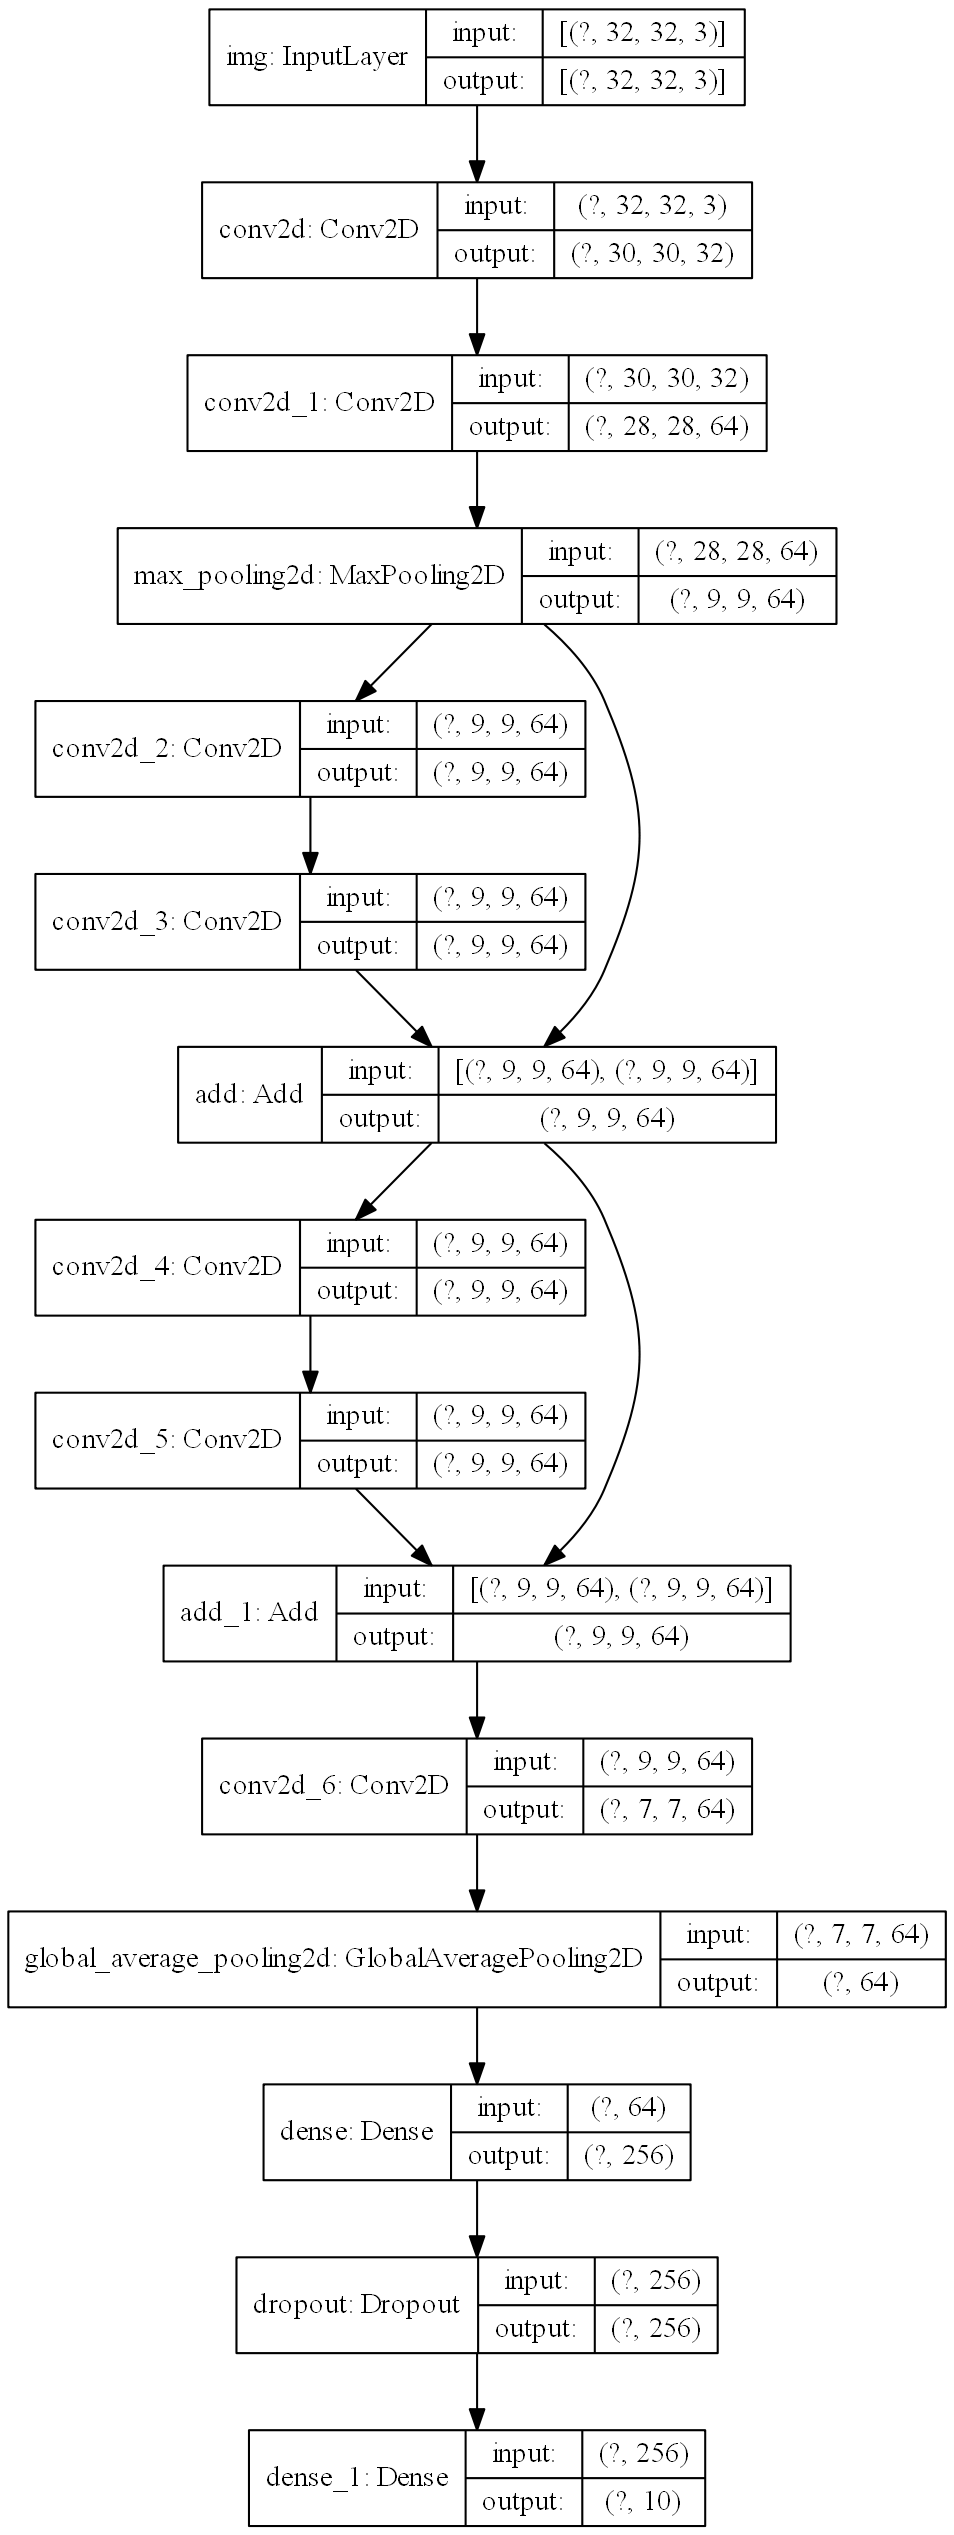

In [31]:
keras.utils.plot_model(model, 'mini_resnet.png', show_shapes=True, dpi=150)

In [39]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model.fit(x_train, y_train,
          batch_size=64,
          epochs=1,
          validation_split=0.2)

   188416/170498071 [..............................] - ETA: 46:16

KeyboardInterrupt: 

In [40]:
# 嵌入映射到128维向量的1000个单词
shared_embedding = layers.Embedding(1000, 128)

text_input_a = keras.Input(shape=(None,), dtype='int32')

text_input_b = keras.Input(shape=(None,), dtype='int32')

# 重用同一层来编码两个输入
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

In [47]:
tf.keras.backend.clear_session()
vgg19 = tf.keras.applications.VGG19()

ResourceExhaustedError: OOM when allocating tensor with shape[3,3,128,256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Mul] name: block3_conv1/kernel/Initializer/random_uniform/mul/

In [ ]:
feat_extraction_model = keras.Model(inputs=vgg19.input, outputs=features_list)

img = np.random.random((1, 224, 224, 3)).astype('float32')
extracted_features = feat_extraction_model(img)

In [ ]:
class CustomDense(layers.Layer):
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='random_normal',
                                 trainable=True)

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b


inputs = keras.Input((4,))
outputs = CustomDense(10)(inputs)

model = keras.Model(inputs, outputs)

In [ ]:
class CustomDense(layers.Layer):

    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='random_normal',
                                 trainable=True)

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

    def get_config(self):
        return {'units': self.units}


inputs = keras.Input((4,))
outputs = CustomDense(10)(inputs)

model = keras.Model(inputs, outputs)
config = model.get_config()

new_model = keras.Model.from_config(config, custom_objects={'CustomDense': CustomDense})